## Exploration et analyse des notes et interactions recettes

Cette étude explore la popularité des recettes du jeu de données public Kaggle `Food.com recipes and user interactions` (`https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions`). Nous cherchons à caractériser ce qui rend une recette « populaire » au sens des notes reçues et de l'activité des utilisateurs.

### Objectif
Comprendre les caractéristiques des recettes populaires (notes moyennes élevées, nombre d'évaluations, etc.) et évaluer le rôle du rating dans l'indice de popularité



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")


In [2]:
# Import the data
recipes = pd.read_csv("../data/RAW_recipes.csv")
interactions = pd.read_csv("../data/RAW_interactions.csv")

In [3]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event',...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piec...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-frien...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and m...",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', '...",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. ...,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['place potatoes in a large pot of lightly salted water and bring to a gentle boil', 'cook until potatoes are just tender', 'drain', 'place potatoes in a large bowl and add all ingredients except ...","this is a super easy, great tasting, make ahead side dish that looks like you spent a lot more time preparing than you actually do. plus, most everything is done in advance. the times do not refle...","['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'ho...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['mix all ingredients& boil for 2 1 / 2 hours , or until thick', 'pour into jars', ""i use'old' glass ketchup bottles"", ""it is not necessary for these to'seal"", ""'my amish mother-in-law has been ma...","my dh's amish mother raised him on this recipe

In [4]:
interactions.head(20)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 ..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I followed this procedure with strawberries instead of raspberries. Perhaps this is the reason it did not work well. Sorry to report that the strawberri..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would start out with 1/3 or 1/4 cup of sugar and jsut add on from there. Just 2 cups was way too much and I had to go back to the grocery store to buy more ra...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [5]:
# Préparation et exploration préliminaire

# Dimensions des jeux
recipes_shape = recipes.shape
interactions_shape = interactions.shape
print({
    'recipes_shape': recipes_shape,
    'interactions_shape': interactions_shape
})

# Comptage des notes observées (incluant 0)
rating_counts = interactions['rating'].value_counts(dropna=False).sort_index()
display(rating_counts)



{'recipes_shape': (231637, 12), 'interactions_shape': (1132367, 5)}


rating
0     60847
1     12818
2     14123
3     40855
4    187360
5    816364
Name: count, dtype: int64

recettes et interactions confirment un volume conséquent pour une analyse robuste. Nous poursuivons avec l'exploration de la variable de la note.


### Analyse univariée de `rating`

Nous examinons la distribution des notes. Remarque: `rating = 0` correspond souvent à une interaction sans note (commentaire sans évaluation). Nous rapporterons des statistiques avec et sans les zéros.


In [6]:
# Statistiques des notes (avec et sans zéros)
ratings_all = interactions['rating'].dropna()
ratings_pos = ratings_all[ratings_all > 0]

summary_all = ratings_all.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
summary_pos = ratings_pos.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

print('Taille (toutes notes):', ratings_all.shape[0])
print('Taille (notes > 0):', ratings_pos.shape[0])
print('\nStatistiques - toutes notes:')
display(summary_all)
print('\nStatistiques - notes > 0:')
display(summary_pos)

# Agréger au niveau recette pour l'analyse suivante
agg = (interactions
       .assign(has_rating=lambda d: d['rating'] > 0)
       .groupby('recipe_id')
       .agg(
           n_interactions=('user_id', 'count'),
           n_rated=('has_rating', 'sum'),
           mean_rating=('rating', lambda s: s[s > 0].mean()),
           median_rating=('rating', lambda s: s[s > 0].median()),
       )
       .reset_index()
      )
agg['share_rated'] = np.where(agg['n_interactions'] > 0, agg['n_rated'] / agg['n_interactions'], np.nan)

display(agg.head())


Taille (toutes notes): 1132367
Taille (notes > 0): 1071520

Statistiques - toutes notes:


count    1.132367e+06
mean     4.411016e+00
std      1.264752e+00
min      0.000000e+00
10%      3.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
90%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Statistiques - notes > 0:


count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
10%      4.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
90%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

,recipe_id,n_interactions,n_rated,mean_rating,median_rating,share_rated
0,38,4,4,4.250000,4.0,1.0
1,39,1,1,3.000000,3.0,1.0
2,40,9,9,4.333333,5.0,1.0
3,41,2,2,4.500000,4.5,1.0
4,43,1,1,1.000000,1.0,1.0


### Recettes les mieux et moins bien notées (seuil de volume)

Nous identifions les recettes extrêmes en appliquant un seuil minimal(**à discuter en groupe**) de n_rated pour éviter les artefacts dus aux de très faibles volumes (par exemple une seule note parfaite).



In [7]:
# Top / Bottom recettes selon la note moyenne (avec seuil)
MIN_RATED = 20  # ajustable
agg_valid = agg[agg['n_rated'] >= MIN_RATED].copy()

# Jointure pour r"cupérer les noms de recettes
recipes_min = recipes[['id', 'name']].rename(columns={'id': 'recipe_id'})
agg_named = agg_valid.merge(recipes_min, on='recipe_id', how='left')

# Top 10
top10 = agg_named.sort_values(['mean_rating', 'n_rated'], ascending=[False, False]).head(10)
# Bottom 10 (exclure mean_rating NaN)
bot10 = agg_named.dropna(subset=['mean_rating']).sort_values(['mean_rating', 'n_rated'], ascending=[True, False]).head(10)

display(top10[['recipe_id', 'name', 'mean_rating', 'n_rated', 'n_interactions']])
display(bot10[['recipe_id', 'name', 'mean_rating', 'n_rated', 'n_interactions']])


,recipe_id,name,mean_rating,n_rated,n_interactions
7332,486496,bacon lattice tomato muffins rsc,5.0,192,202
7317,474520,company s coming mashed potatoes,5.0,95,97
7392,515167,simply irresistible tropical potato salad sp5,5.0,73,74
5557,154351,kittencal s balsamic vinaigrette,5.0,69,71
6003,186029,the best creole cajun seasoning mix,5.0,67,68
7362,495275,peppered buffalo ranch shrimp pizza rsc,5.0,64,70
2564,55309,caprese salad tomatoes italian marinated tomatoes,5.0,52,52
7399,524863,ragu shuka ragu,5.0,49,50
7356,495124,warm roasted root vegetable and chicken salad rsc,5.0,46,47
7387,514605,animal style skillet potatoes sp5,5.0,46,53


,recipe_id,name,mean_rating,n_rated,n_interactions
7207,382085,olive garden ravioli di portobello portabella mushroom ravioli,3.000000,20,23
6910,294059,flourless brownies sugar free low carb,3.190476,21,24
1808,37768,queso blanco mexican white cheese dip,3.464286,28,34
5909,178370,simple vanilla cupcakes,3.469388,196,247
5634,159268,guaranteed winner london broil,3.500000,22,31
1386,29480,logan s roadhouse buttery dinner rolls,3.542857,35,38
5848,173076,easy microwave bacon,3.560000,25,29
3013,65363,italian rum cake,3.571429,21,26
2118,45115,breakfast in a crock pot,3.590909,22,24
6819,277167,crock pot chicken wings,3.590909,22,24


Nous disposons, par recette, du volume total, du volume noté, de la part notée, et de statistiques de note. C’est la base pour définir des scores de popularité.


### Visualisations: distributions et relation volume-note

Nous visualisons:
- **Histogramme** et **boxplot** des notes (avec et sans zéros)
- **Dispersion** de la relation entre `n_rated` et `mean_rating` (avec transparence) et **subplots** par tranches de volume


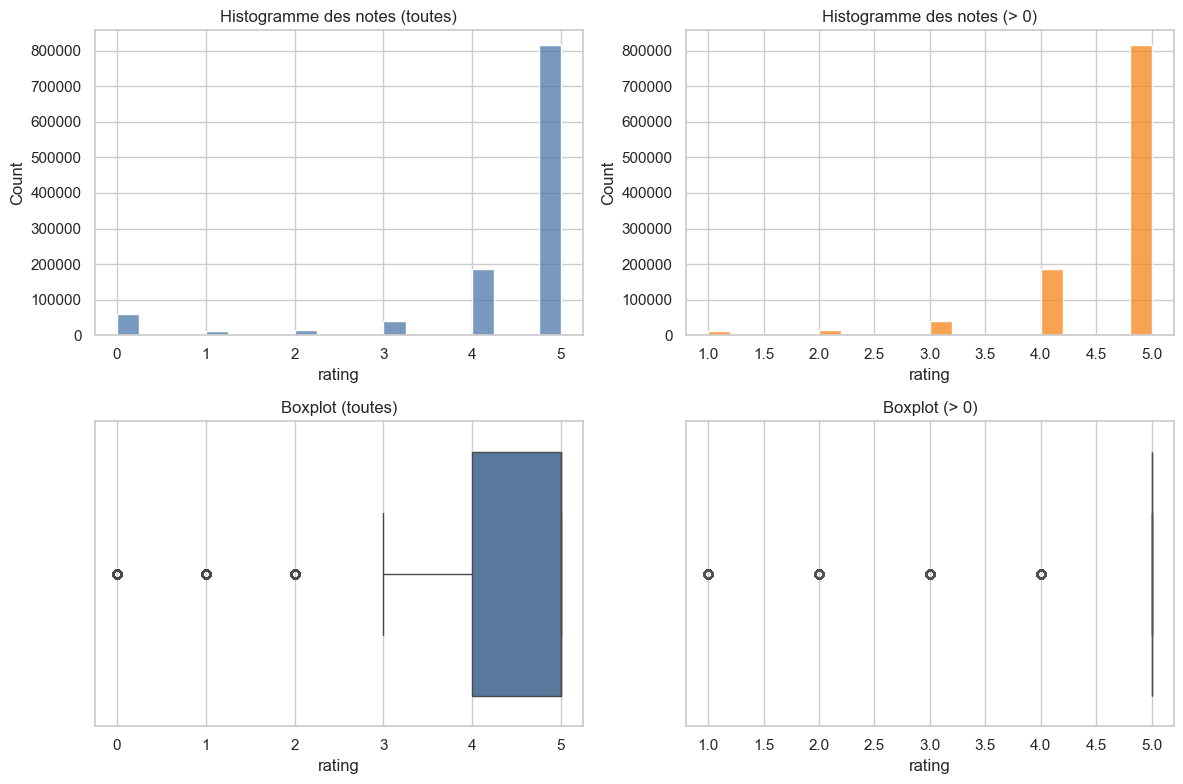

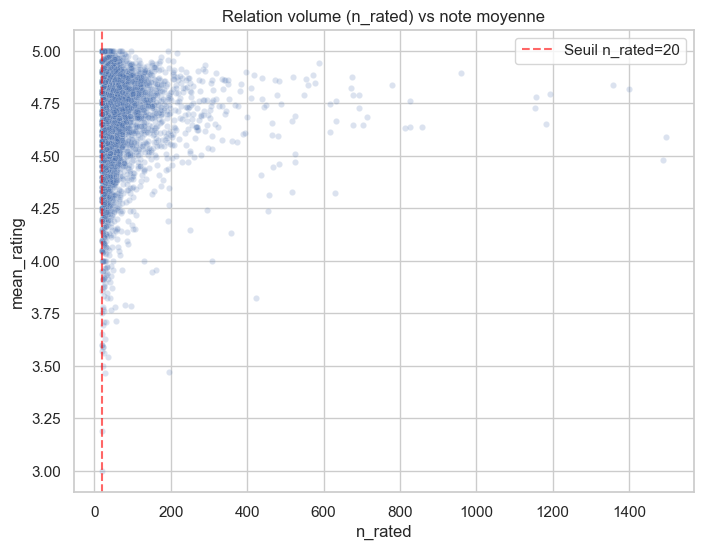

<Figure size 640x480 with 0 Axes>

In [8]:
# Histogrammes et boxplots des notes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogramme toutes notes
sns.histplot(ratings_all, bins=20, kde=False, ax=axes[0, 0], color='#4C78A8')
axes[0, 0].set_title('Histogramme des notes (toutes)')
axes[0, 0].set_xlabel('rating')

# Histogramme notes > 0
sns.histplot(ratings_pos, bins=20, kde=False, ax=axes[0, 1], color='#F58518')
axes[0, 1].set_title('Histogramme des notes (> 0)')
axes[0, 1].set_xlabel('rating')

# Boxplot toutes notes
sns.boxplot(x=ratings_all, ax=axes[1, 0], color='#4C78A8')
axes[1, 0].set_title('Boxplot (toutes)')
axes[1, 0].set_xlabel('rating')

# Boxplot notes > 0
sns.boxplot(x=ratings_pos, ax=axes[1, 1], color='#F58518')
axes[1,  1].set_title('Boxplot (> 0)')
axes[1, 1].set_xlabel('rating')

plt.tight_layout()
plt.show()

# Scatter n_rated vs mean_rating (avec transparence)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=agg_named, x='n_rated', y='mean_rating', alpha=0.2, s=20)
ax.axvline(MIN_RATED, color='red', linestyle='--', alpha=0.6, label=f'Seuil n_rated={MIN_RATED}')
ax.set_title('Relation volume (n_rated) vs note moyenne')
ax.legend()
plt.show()

plt.tight_layout()
plt.show()


Les notes se concentrent vers le haut, surtout en excluant 0. Pour le calcul du score de popularité, nous n'utiliserons désormais que les valeurs de rating>0 et considérerons un seuil minimal (>=4 par exemple) comme positif pour la proportion.


Pourquoi exclure les ratings = 0 ?
Dans ce dataset, 0 reflète le plus souvent une interaction sans note (commentaire sans évaluation). Les intégrer biaiserait la distribution et sous‑estimerait la qualité. Conserver 0 pour des métriques d’engagement (n_interactions), mais l’exclure pour les statistiques de qualité (moyenne, proportion positive) est plus fidèle à l’intention utilisateur.

### Analyse critique: la note moyenne est-elle suffisante ?

Des notes très élevées avec peu d'évaluations ne garantissent pas la popularité. Il faut pondérer par le nombre d'évaluations. Le ratio share_rated renseigne sur l'engagement (beaucoup d'interactions mais peu de notes évoquent un autre comportement).

Idée d'indicateur de popularité : une moyenne pondérée f(mean_rating, n_rated, share_rated) ou encore un score de Wilson pour ordonner avec incertitude.


### Scores de popularité composites et classement global

Nous calculons deux scores:
- La borne inférieure de Wilson (Wilson lower bound (95%)) sur la proportion d'évaluations positives (rating ≥ 4)
- Moyenne pondérée par log(volume): combine mean_rating et n_rated via log(1 + n_rated) (On n'exclura "share_rated" pour le moment)

Nous produisons ensuite des classements globaux (top 20) et un score combiné normalisé.


Précision : le score de Wilson fournit une borne inférieure d’un intervalle de confiance pour une proportion (ici, part d’évaluations positives). Il pénalise naturellement les faibles volumes et réduit le risque de surclasser des recettes avec peu d’avis mais une proportion parfaite. Combiner un indicateur de fiabilité (Wilson) avec un indicateur de volume/qualité (moyenne log‑pondérée). 

La moyenne pondérée simple ignore l’incertitude; l’approche conjointe (70% Wilson, 30% log‑w par exemple mais **à discuter en groupe**) équilibre fiabilité et traction.    

Pourquoi un seuil « positif » à rating ≥ 4 ?
Empiriquement, les notations en ligne sont asymétriques (biais positif). Le seuil "≥ 4" isole des retours franchement favorables tout en tolérant des 4/5 fréquents. Cela évite qu’une recette très neutre (3) gonfle artificiellement la proportion « positive ».

Le seuil est ajustable: on peut tester "≥ 5" (plus strict) ou "≥ 3" (plus inclusif) selon le besoin (**à discuter en groupe également**)

In [11]:
# Scores composites: Wilson et moyenne pondérée log-volume
from math import sqrt

def wilson_lower_bound(positives: np.ndarray, n: np.ndarray, z: float = 1.96) -> np.ndarray:
    n = n.astype(float)
    p = np.divide(positives, n, out=np.zeros_like(n, dtype=float), where=n>0)
    denom = 1 + z**2 / n
    center = p + z*z/(2*n)
    margin = z * np.sqrt(np.divide(p*(1-p) + z*z/(4*n), n, out=np.zeros_like(n, dtype=float), where=n>0))
    lower = (center - margin) / denom
    lower[n == 0] = 0.0
    return lower

def log_weighted_mean(mean_rating: np.ndarray, n_rated: np.ndarray) -> np.ndarray:
    return np.nan_to_num(mean_rating, nan=0.0) * np.log1p(n_rated)

def minmax(series: pd.Series) -> pd.Series:
    vmin, vmax = series.min(), series.max()
    if pd.isna(vmin) or pd.isna(vmax) or vmax == vmin:
        return pd.Series(np.zeros_like(series), index=series.index)
    return (series - vmin) / (vmax - vmin)


    

MIN_RATED = 20
base = agg_named[agg_named['n_rated'] >= MIN_RATED].copy()
if 'positives' not in base.columns:
    agg_pos = (
        interactions.assign(pos=(interactions['rating'] >= 4) & (interactions['rating'] > 0))
        .groupby('recipe_id')
        .agg(positives=('pos', 'sum'))
        .reset_index()
    )
    base = base.merge(agg_pos, on='recipe_id', how='left')
    base['positives'] = base['positives'].fillna(0).astype(int)


base['wilson_lb'] = wilson_lower_bound(base['positives'].values, base['n_rated'].values, z=1.96)
base['logw_mean'] = log_weighted_mean(base['mean_rating'].values, base['n_rated'].values)
base['wilson_norm'] = minmax(base['wilson_lb'])
base['logw_norm'] = minmax(base['logw_mean'])

# combinaisons
base['score_combo_50_50'] = 0.5 * base['wilson_norm'] + 0.5 * base['logw_norm']
base['score_combo_70_30'] = 0.7 * base['wilson_norm'] + 0.3 * base['logw_norm']

# classements
rank_wilson_top20 = base.sort_values(['wilson_lb', 'n_rated'], ascending=[False, False]).head(20)
rank_logw_top20 = base.sort_values(['logw_mean', 'n_rated'], ascending=[False, False]).head(20)
rank_50_50_top20  = base.sort_values(['score_combo_50_50', 'n_rated'], ascending=[False, False]).head(20)
rank_70_30_top20  = base.sort_values(['score_combo_70_30', 'n_rated'], ascending=[False, False]).head(20)

display(rank_wilson_top20[['recipe_id','name','n_rated','mean_rating','wilson_lb']])
display(rank_logw_top20[['recipe_id','name','n_rated','mean_rating','logw_mean']])
display(rank_50_50_top20[['recipe_id','name','n_rated','mean_rating','score_combo_50_50']])
display(rank_70_30_top20[['recipe_id','name','n_rated','mean_rating','score_combo_70_30']])


,recipe_id,name,n_rated,mean_rating,wilson_lb
7329,486261,mexican stack up rsc,217,4.990783,0.982605
4626,111777,chicken pot pie with 2 crusts,193,4.958549,0.980484
7332,486496,bacon lattice tomato muffins rsc,192,5.000000,0.980384
2159,46262,uncle bill s method for cooking turkey,175,4.971429,0.978520
5011,128566,homemade chicken pot pie,156,4.923077,0.975966
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.975645
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.975591
1440,30358,perfect pasta with no watching and no sweating,152,4.940789,0.975349
220,8739,wholly guacamole,290,4.903448,0.975207
6409,221743,kittencal s best blasted rapid roast whole chicken,290,4.931034,0.975207


,recipe_id,name,n_rated,mean_rating,logw_mean
65,2886,best banana bread,1401,4.819415,34.919817
1865,39087,creamy cajun chicken pasta,1359,4.838852,34.913479
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,33.963663
1558,32204,whatever floats your boat brownies,1155,4.780087,33.712617
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,33.611454
1254,27208,to die for crock pot roast,1496,4.589572,33.555365
991,22782,jo mama s world famous spaghetti,1154,4.729636,33.352711
2526,54257,yes virginia there is a great meatloaf,1182,4.652284,32.918674
3837,89204,crock pot chicken with black beans cream cheese,1488,4.478495,32.719255
1303,28148,oven fried chicken chimichangas,779,4.838254,32.219357


,recipe_id,name,n_rated,mean_rating,score_combo_50_50
1865,39087,creamy cajun chicken pasta,1359,4.838852,0.988482
65,2886,best banana bread,1401,4.819415,0.977529
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.969827
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,0.955004
1558,32204,whatever floats your boat brownies,1155,4.780087,0.941512
1303,28148,oven fried chicken chimichangas,779,4.838254,0.938979
306,10744,delicious chicken pot pie,674,4.876855,0.933576
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.929336
991,22782,jo mama s world famous spaghetti,1154,4.729636,0.926571
1830,38298,olive garden copycat zuppa toscana,572,4.886364,0.919350


,recipe_id,name,n_rated,mean_rating,score_combo_70_30
1865,39087,creamy cajun chicken pasta,1359,4.838852,0.983973
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.978053
65,2886,best banana bread,1401,4.819415,0.968541
1303,28148,oven fried chicken chimichangas,779,4.838254,0.956461
306,10744,delicious chicken pot pie,674,4.876855,0.955846
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.953729
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,0.951838
1830,38298,olive garden copycat zuppa toscana,572,4.886364,0.947387
1558,32204,whatever floats your boat brownies,1155,4.780087,0.936843
2054,43509,crumb topped banana muffins,521,4.877159,0.936624


Les classements sont cohérents: comme dit plus haut, Wilson privilégie la fiabilité (proportion positive avec incertitude), tandis que la moyenne log‑pondérée favorise les recettes à fort volume. La combinaison 70/30 donne un compromis orienté qualité/fiabilité.


In [ ]:
# Exports CSV des classements
output_dir = "../data"
rank_wilson_top20.to_csv(f"{output_dir}/rank_top20_wilson.csv", index=False)
rank_logw_top20.to_csv(f"{output_dir}/rank_top20_logw.csv", index=False)
rank_50_50_top20.to_csv(f"{output_dir}/rank_top20_combo_50_50.csv", index=False)
rank_70_30_top20.to_csv(f"{output_dir}/rank_top20_combo_70_30.csv", index=False)

# Exporter également la table complète avec scores
base.to_csv(f"{output_dir}/recipes_scores_all.csv", index=False)

print("Exports écrits dans data/: rank_top20_wilson.csv, rank_top20_logw.csv, rank_top20_combo_50_50.csv, rank_top20_combo_70_30.csv, recipes_scores_all.csv")


Les exports CSV générés dans "data/" permettront de partager les résultats et de les réutiliser (ex: app Streamlit, etc...).
